In [1]:
# Importing some modules
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from inspect import getfullargspec

# Some statistics

<center>
  <img src="https://miro.medium.com/max/500/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg" alt="A meme about machine learning being a fancy name for statistics" class="bg-primary" width="500px">
    <i><br>Original comic from <a href="https://www.instagram.com/sandserifcomics/">sandserif</a></i>
</center><br>

While the above image is [hyperbolic](https://towardsdatascience.com/no-machine-learning-is-not-just-glorified-statistics-26d3952234e3), learning about machine learning methods benefits from some basic grounding in statistics.
Therefore, we will *quickly* introduce some basics of statistical modelling for data analysis before moving on to look at our traditional machine learning methods.

## Model-dependent analysis

The majority of neutron scattering (both elastic and inelastic) data is analysed through a model-dependent approach.
This is where some model is proposed that we can produce some model data from, the model has some parameters that we refine to get the best agreement between the model data and our experimental data.
Consider the fitting of different functional descriptions to quasi-elastic neutron scattering (QENS) data.
Below, we read in and plot some [example](./example) QENS data.
This file can be obtained [here](https://raw.githubusercontent.com/arm61/trad_ml_methods/main/lorentzian.txt), but it should be accessible on Colab and MyBinder. 

In [2]:
x, y, yerr = np.loadtxt('lorentzian.txt', unpack=True)

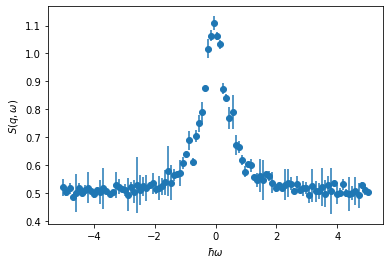

In [3]:
plt.errorbar(x, y, yerr, marker='o', ls='')
plt.xlabel('$\hbar \omega$')
plt.ylabel('$S(q,\omega)$')
plt.show()

The aim is to model this as a Lorentzian funtion with some uniform background added (for simplicity we will ignore the resolution function). 
We can describe this mathematically as follows, 

$$ y = \frac{A}{\pi\gamma \Big[1 + \big(\frac{x - x_0}{\gamma}\big)^2\Big]} + b, $$

where, $A$ is a scale factor, $\gamma$ is half of the full width at half maximum, $x_0$ is the peak centre, and $b$ is the uniform background.
Above, we have used $x$ and $y$ in lieu of $\hbar\omega$ and $S(q, \omega)$.
In order to use this function for analysis, we will write is as a Python function. 

In [4]:
def lorentzian(x, A, gamma, x0, b):
    """
    Lorentzian function for QENS analysis.
    
    Args:
        x (array_like): energy transfer values. 
        A (float): scale factor.
        gamma (float): half width at half maximum.
        x_0 (float): peak centre
        b (float): background
        
    Returns:
        (array_like): model scattering function"""
    return (A / (np.pi * gamma * (1 + np.square((x - x0) / gamma)))) + b

You may be familiar with using `scipy.optimize.curve_fit` to optimize the parameters of some function to a dataset. 
We carry this out below.

In [5]:
popt, pcov = curve_fit(lorentzian, x, y, sigma=yerr, absolute_sigma=True)
punc = np.sqrt(np.diag(pcov))

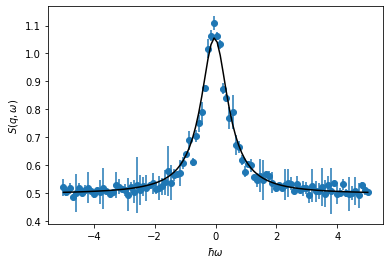

In [6]:
plt.errorbar(x, y, yerr, marker='o', ls='')
plt.plot(x, lorentzian(x, *popt), 'k', zorder=10)
plt.xlabel('$\hbar \omega$')
plt.ylabel('$S(q,\omega)$')
plt.show()

In [7]:
for i, arg in enumerate(getfullargspec(lorentzian).args[1:]):
    print(f"{arg:<6}= {popt[i]:^7.3f}+/- {punc[i]:>.3f}")

A     =  0.946 +/- 0.011
gamma =  0.538 +/- 0.008
x0    = -0.038 +/- 0.007
b     =  0.496 +/- 0.001


This is a simple example of the application of model dependent analysis, we have used some optimisation method (in this example, the Levenberg-Marquardt algorithm {cite}`levenberg_method_1944`) to find the values of $A$, $\gamma$, $x_0$, and $b$ that offer the best agreement between our data and our model. 